In [17]:
import os, librosa, time, pickle
import numpy as np
import matplotlib.pyplot as plt
from librosa.core import stft
from librosa.feature import melspectrogram, mfcc
import warnings
warnings.filterwarnings('ignore')
dir_train = '../data/train/'
dir_test = '../data/test/'
dir_output = '../data/features_extraction/'

Function for the features extraction of an audio *.wav* file.

In [18]:
def features_extraction(file_path, frequency, speed, features_type, n_fft, hop_length, n_mels, n_mfcc,
                        fmin=300, fmax=8000, center=False):
    
    # Load the wave (speed <1 speed down = data augmentation & >1 speed up = data reduction)
    wave, frequency = librosa.core.load(file_path, sr=int(frequency/speed))

    # Feature extraction
    if features_type=='log-spectrogram':
        features = np.log(np.abs(stft(y=wave, n_fft=n_fft, hop_length=hop_length, center=center)))
    elif features_type=='log-mel-spectrogram':
        features = np.log(melspectrogram(y=wave, sr=frequency, n_fft=n_fft, hop_length=hop_length,
                                         n_mels=n_mels, fmin=fmin,fmax=fmax, center=center))
    elif features_type=='mfcc':
        features = mfcc(y=wave, sr=frequency, n_fft=n_fft, hop_length=hop_length, n_mfcc=n_mfcc,
                        fmin=fmin, fmax=fmax, center=center)
        
    # Transpose the spectoggram shape (rows=frames, cols=features) and return
    return features.transpose()

Run the feature extraction for train and test audio files and save it.



Features log-mel-spectrogram for train audio files:
Train file 35709 [==================================================]

Features log-mel-spectrogram for test audio files:
Test file 3130 [==================================================]


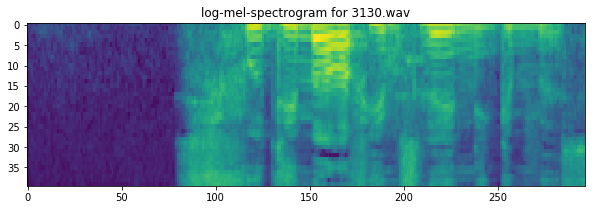



Features mfcc for train audio files:
Train file 35709 [==================================================]

Features mfcc for test audio files:
Test file 3130 [==================================================]


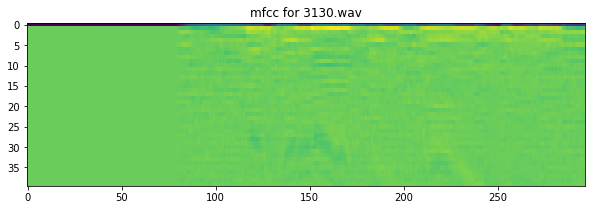

In [16]:
FILES_PATH_TRAIN = [dir_train+filename for filename in os.listdir(dir_train)]
FILES_PATH_TEST = [dir_test+filename for filename in os.listdir(dir_test)]
N_FFT = 512
HOP_LENGTH = 160
FREQUENCY = 16000
SPEED = 1
N_MELS = 40
N_MFCC = 40

for FEATURES_TYPE in ['log-mel-spectrogram','mfcc']:

    # Define the train and test directories to save the features
    new_dir_train = dir_output+'train/'+FEATURES_TYPE
    new_dir_test = dir_output+'test/'+FEATURES_TYPE
    if 'mfcc' in FEATURES_TYPE:
        new_dir_train += '_'+str(N_MFCC)
        new_dir_test += '_'+str(N_MFCC)
    elif 'mel' in FEATURES_TYPE:
        new_dir_train += '_'+str(N_MELS)
        new_dir_test += '_'+str(N_MELS)
    new_dir_train += ('' if SPEED==1 else '_speed'+str(SPEED))+'/'
    new_dir_test += ('' if SPEED==1 else '_speed'+str(SPEED))+'/'

    # Train
    print('\n\nFeatures '+FEATURES_TYPE+' for train audio files:')
    N = len(FILES_PATH_TRAIN)
    for i, file_path in enumerate(FILES_PATH_TRAIN):
        print('\rTrain '+str(i+1)+' [{:50s}]'.format('='*int(50*(i+1)/N)), end='\n' if (i+1)==N else '')
        features = features_extraction(file_path=file_path, speed=SPEED, features_type=FEATURES_TYPE,
                                       n_fft=N_FFT, hop_length=HOP_LENGTH, frequency=FREQUENCY,
                                       n_mels=N_MELS, n_mfcc=N_MFCC)
        new_file_path = new_dir_train+file_path.split('/')[-1].replace('.wav', '.npy')
        np.save(new_file_path, features)

    # Test
    print('\nFeatures '+FEATURES_TYPE+' for test audio files:')
    N = len(FILES_PATH_TEST)
    for i, file_path in enumerate(FILES_PATH_TEST):
        print('\rTest '+str(i+1)+' [{:50s}]'.format('='*int(50*(i+1)/N)), end='\n' if (i+1)==N else '')
        features = features_extraction(file_path=file_path, speed=SPEED, features_type=FEATURES_TYPE,
                                       n_fft=N_FFT, hop_length=HOP_LENGTH, frequency=FREQUENCY,
                                       n_mels=N_MELS, n_mfcc=N_MFCC)
        new_file_path = new_dir_test+file_path.split('/')[-1].replace('.wav', '.npy')
        np.save(new_file_path, features)
        
    # Imshow example
    plt.figure(figsize=(10,3))
    plt.imshow(features.T, aspect='auto')
    plt.title(FEATURES_TYPE+' for '+file_path.split('/')[-1])
    plt.show()